# Total routine to output the ADR from a fits file

In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as F
import astropy.coordinates as AC
from astropy import units as u

from pyifu import adr as ADR

In [3]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.origin'] = True

In [4]:
hdu = F.open("Data/reduc_20170530_130.fits") 
head = hdu[0].header
print(repr(head))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD11980 '           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170531.024522' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

## **From Header**

In [5]:
dec = AC.Angle(head['DEC'], unit=u.deg)
hour_angle = AC.Angle(head['HA'], unit=u.hourangle)

temperature = head['OUTTEMP']         # outside temp (C) 
pressure = head['OUTPRESS']           # outside pressure (mbar)
humidity = head['OUTHUM']             # outside humidity (%)
airmass = head['AIRMASS']             # airmass


#print('On the ' + str(time).split('T')[0] + ' at ' + str(time).split('T')[1] + '\n')
#print('declination angle ~ {x:.4f}'.format(x=dec))
#print('  right ascension ~ {x:.4f}'.format(x=ra.degree*u.deg))
#print('       hour angle ~ {x:.4f} \n'.format(x=hour_angle.degree*u.deg))
#print('temperature = {}°C'.format(temperature))
#print('   pressure = {} mbar'.format(pressure))
#print('   humidity = {}%'.format(humidity))
#print('    airmass = {}'.format(airmass))

## **Added Data**
Correct onlyf SMARTS 0.9-m is the telescope used (written 0.9m telescope on header)
http://www.ctio.noao.edu/noao/node/2085

---

In [6]:
geod_lat = AC.Latitude('-30:10:07.90', unit=u.deg)                         #from CTIO doc
geod_lon = AC.Angle('-70:48:23.86', unit=u.deg)   
geod_height = 2241.4* u.m
elevation = 2206.8* u.m


#print('geodetic longitude ~ {x:.4f}'.format(x=geod_lon))
#print('geodetic latitude  ~ {x:.4f}'.format(x=geod_lat))
#print('geodetic height = {}'.format(geod_height))
#print('         elevation = {}'.format(elevation))

## **Checks**

### Yannick -> works but weird zenith dist

In [7]:
zenithdist, parangle = ADR.hadec2zdpar(hour_angle.degree, dec.degree, geod_lat.degree, deg=True)

print('\n Parallactic angle = {x:.4f} degrees'.format(x=parangle))


 Parallactic angle = 121.1216 degrees


## Build ADR plot

In [25]:
x_ref =  5                           # in arcsec
y_ref =  6                           # in arcsec
lbdaref = 4000                       # in angstrom

lbdas = np.linspace(4000, 6000, 50)

In [26]:
adr = ADR.ADR(airmass=airmass, parangle=parangle, temperature=temperature,
              pressure=pressure, lbdaref=lbdaref, relathumidity=humidity)

arcsecshift = adr.refract(x_ref, y_ref, lbdas)

In [27]:
pixsize = head['XPIXSIZE']            # Size of a pixel in arcsec
xpix_shift = (arcsecshift[0] - x_ref)/pixsize
ypix_shift = (arcsecshift[1] - y_ref)/pixsize

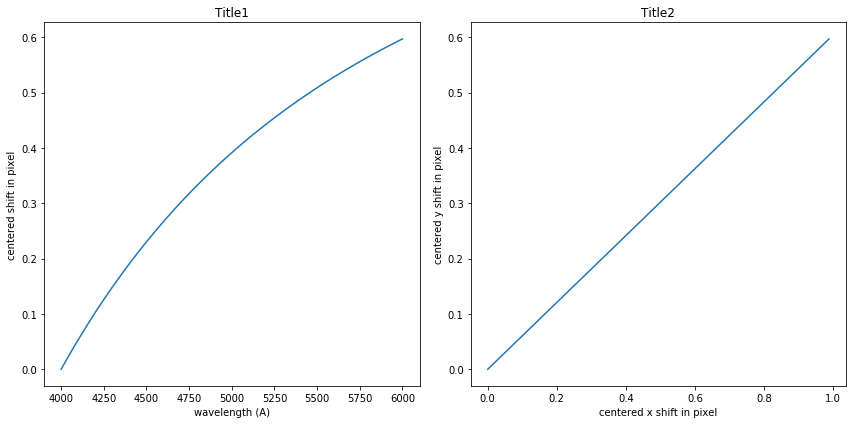

In [28]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.plot(lbdas, ypix_shift)
ax1.set_title('Title1')
ax1.set_xlabel('wavelength (A)')
ax1.set_ylabel('centered shift in pixel')

ax2.plot(xpix_shift, ypix_shift)
ax2.set_title('Title2')
ax2.set_xlabel('centered x shift in pixel')
ax2.set_ylabel('centered y shift in pixel')

plt.tight_layout()
plt.show()

### Useless plot

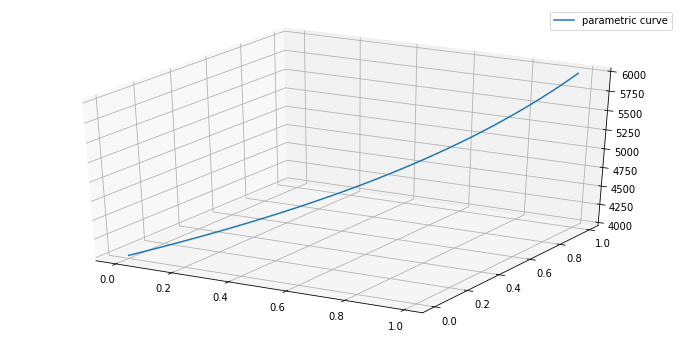

USELEEEEEESS


In [13]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
z = lbdas
x = xpix_shift
y = xpix_shift
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()
print("USELEEEEEESS")